In [1]:
import pandas as pd

distance_df = pd.read_parquet("../sorted_values.parquet")
distance_df

,white,black,distance
0,bbnnqrkr,bbnnqrkr,0.0
1,qnbbrknr,qnbbrknr,0.0
2,rnbbknrq,rnbbknrq,0.0
3,rnbbknqr,rnbbknqr,0.0
4,rnbbqnkr,rnbbqnkr,0.0
...,...,...,...
921595,rbbnkqrn,qnnbrkbr,1.0
921596,rbbnkqrn,nrkbqnbr,1.0
921597,nqnrbkrb,rkqbrnbn,1.0
921598,brqnnkrb,rnbqkbnr,1.0


<Axes: ylabel='Frequency'>

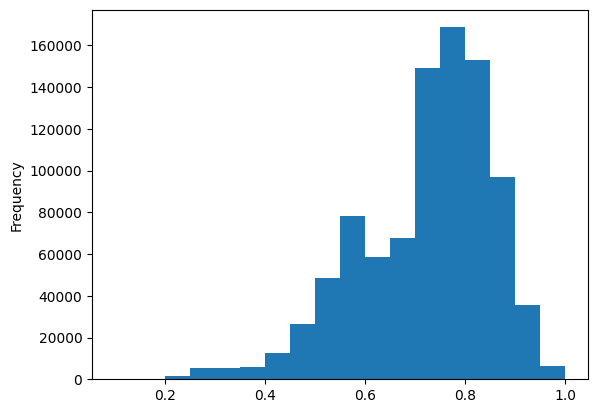

In [2]:
DISTANCE_THRESHOLD = 0.1
distance_df[distance_df["distance"] > DISTANCE_THRESHOLD]["distance"].plot.hist(
    bins=18, range=(0.1, 1)
)

In [15]:
df_samples = distance_df.where(distance_df.distance > 0.0).dropna()
df_samples.sample(frac=1, weights=df_samples.distance, random_state=42)

,white,black,distance
412742,nrnbkrbq,rbnnbqkr,0.715278
887200,qbbrnnkr,rkqnbnrb,0.937500
719181,rkbnrqnb,nnbbqrkr,0.826389
610352,nnrkbqrb,qbnnrkbr,0.777778
198116,rbbnnqkr,qnbrnbkr,0.638889
...,...,...,...
6132,nnbrkbqr,nnrkbbqr,0.298611
980,rkbbrqnn,rkbbrnqn,0.236111
4864,nbbrkrqn,nbbrkqrn,0.291667
2340,rnnqkrbb,nrnqkrbb,0.236111


In [17]:
# df where white is reversed black
df_reversed = distance_df.where(
    distance_df.white == distance_df.black.str[::-1]
).dropna()
df_reversed

,white,black,distance
3065,nbrqkrbn,nbrkqrbn,0.291667
3066,nbrkqrbn,nbrqkrbn,0.291667
3622,bnrqkrnb,bnrkqrnb,0.291667
3751,bnrkqrnb,bnrqkrnb,0.291667
3860,brnqknrb,brnkqnrb,0.291667
...,...,...,...
920381,rbknbqrn,nrqbnkbr,1.000000
920432,bqrknbrn,nrbnkrqb,1.000000
920728,bqrnkbrn,nrbknrqb,1.000000
921025,bnrbnkrq,qrknbrnb,1.000000


<Axes: ylabel='Frequency'>

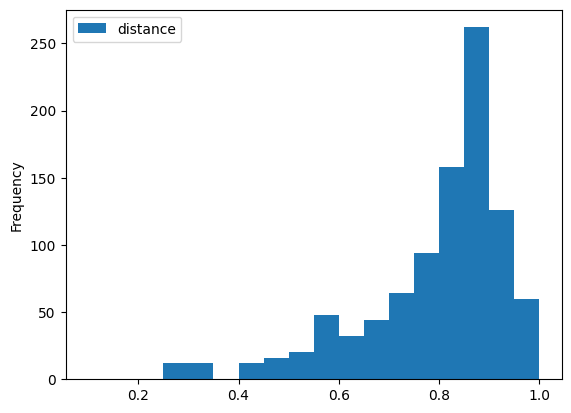

In [18]:
df_reversed.plot.hist(bins=18, range=(0.1, 1))

In [37]:
from stockfish import Stockfish

stockfish = Stockfish(
    depth=40, parameters={"UCI_Chess960": "true", "Hash": 2048, "Threads": 7}
)
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'true',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 7,
 'Hash': 2048}

In [38]:
# load first row of df_samples as starting position in FEN notation
row = df_samples.iloc[0]
starting_position_fen = (
    f"{row.black.lower()}/pppppppp/8/8/8/8/PPPPPPPP/{row.white.upper()} w KQkq - 0 1"
)
stockfish.set_fen_position(starting_position_fen)
print(stockfish.get_board_visual())
print(starting_position_fen)

+---+---+---+---+---+---+---+---+
| r | q | b | k | n | r | n | b | 8
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p | 7
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 3
+---+---+---+---+---+---+---+---+
| P | P | P | P | P | P | P | P | 2
+---+---+---+---+---+---+---+---+
| R | N | B | K | N | R | Q | B | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h

rqbknrnb/pppppppp/8/8/8/8/PPPPPPPP/RNBKNRQB w KQkq - 0 1


In [39]:
stockfish.get_wdl_stats()

[282, 715, 3]

In [40]:
stockfish.get_top_moves()

[{'Move': 'g2g4', 'Centipawn': 62, 'Mate': None},
 {'Move': 'e2e4', 'Centipawn': 60, 'Mate': None},
 {'Move': 'd2d3', 'Centipawn': 59, 'Mate': None},
 {'Move': 'f2f4', 'Centipawn': 54, 'Mate': None},
 {'Move': 'b1c3', 'Centipawn': 53, 'Mate': None}]

In [41]:
stockfish.set_depth(30)

In [44]:
stockfish.get_wdl_stats()

[224, 772, 4]

In [43]:
stockfish.get_top_moves()

[{'Move': 'e2e4', 'Centipawn': 69, 'Mate': None},
 {'Move': 'g2g4', 'Centipawn': 63, 'Mate': None},
 {'Move': 'b1c3', 'Centipawn': 55, 'Mate': None},
 {'Move': 'f2f4', 'Centipawn': 53, 'Mate': None},
 {'Move': 'd2d3', 'Centipawn': 51, 'Mate': None}]